In [1]:
import pandas as pd
import sqlite3
import numpy as np
from datetime import datetime
import os
import logging
from pprint import pprint

import gym
import gym.spaces

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

logger = logging.getLogger(__name__)

In [2]:
db_link ="/home/mateusz/Desktop/Moje_repo/My-Data-Science-repository/Stock_data_project/mWIG40/WIG40/WIG40/Wig40.db"
conn = sqlite3.connect(db_link)

df = pd.read_sql('SELECT * FROM wig40',
            conn)

dates = [datetime.strptime(x, "%d-%m-%Y") for x in df["date"]]
df["date"] = dates

In [3]:
df.head()

,date,ticker,open,MAX,MIN,close,volume,trade
0,2021-12-29,11 BIT STUDIOS SPOLKA AKCYJNA,546.0,557.5,546.0,556.0,2516.0,1395245.0
1,2021-12-28,11 BIT STUDIOS SPOLKA AKCYJNA,557.5,558.0,545.0,545.0,6794.0,3757159.0
2,2021-12-27,11 BIT STUDIOS SPOLKA AKCYJNA,540.0,557.5,536.5,557.5,6152.0,3393715.0
3,2021-12-23,11 BIT STUDIOS SPOLKA AKCYJNA,550.0,562.0,540.5,545.5,13423.0,7442734.0
4,2021-12-22,11 BIT STUDIOS SPOLKA AKCYJNA,539.0,554.0,536.0,554.0,5221.0,2845306.0


In [4]:
df.ticker.unique()

array(['11 BIT STUDIOS SPOLKA AKCYJNA',
       'X-TRADE BROKERS DOM MAKLERSKI SPOLKA AKCYJNA',
       'WIRTUALNA POLSKA HOLDING SPOLKA AKCYJNA',
       'TEN SQUARE GAMES SPOLKA AKCYJNA', 'SELVITA SPOLKA AKCYJNA',
       'PLAYWAY SPOLKA AKCYJNA', 'PKP CARGO SPOLKA AKCYJNA',
       'POLENERGIA SPOLKA AKCYJNA', 'PEPCO GROUP N.V.',
       'NEUCA SPOLKA AKCYJNA', 'BANK MILLENNIUM SPOLKA AKCYJNA',
       'MBANK SPOLKA AKCYJNA', 'MABION SPOLKA AKCYJNA',
       'LIVECHAT SOFTWARE SPOLKA AKCYJNA', 'GRUPA KĘTY SPOLKA AKCYJNA',
       'KRUK SPOLKA AKCYJNA', 'KERNEL HOLDING S.A.', 'HUUUGE, INC.',
       'GIELDA PAPIEROW WARTOŚCIOWYCH W WARSZAWIE SPOLKA AKCYJNA',
       'ING BANK ŚLĄSKI SPOLKA AKCYJNA', 'ENEA SPOLKA AKCYJNA',
       'AMREST HOLDINGS SE', 'EUROCASH SPOLKA AKCYJNA',
       'FAMUR SPOLKA AKCYJNA', 'DEVELIA SPOLKA AKCYJNA',
       'DOM DEVELOPMENT SPOLKA AKCYJNA', 'CELON PHARMA SPOLKA AKCYJNA',
       'COMARCH SPOLKA AKCYJNA', 'DATAWALK SPOLKA AKCYJNA',
       'CIECH SPOLKA AKCYJNA', '

# Multi Indexing DF

In [5]:
df.loc[df["ticker"]==df.ticker.unique()[0]].set_index("date")

,ticker,open,MAX,MIN,close,volume,trade
date,,,,,,,
2021-12-29,11 BIT STUDIOS SPOLKA AKCYJNA,546.00,557.50,546.00,556.00,2516.0,1395245.0
2021-12-28,11 BIT STUDIOS SPOLKA AKCYJNA,557.50,558.00,545.00,545.00,6794.0,3757159.0
2021-12-27,11 BIT STUDIOS SPOLKA AKCYJNA,540.00,557.50,536.50,557.50,6152.0,3393715.0
2021-12-23,11 BIT STUDIOS SPOLKA AKCYJNA,550.00,562.00,540.50,545.50,13423.0,7442734.0
2021-12-22,11 BIT STUDIOS SPOLKA AKCYJNA,539.00,554.00,536.00,554.00,5221.0,2845306.0
...,...,...,...,...,...,...,...
2016-06-01,11 BIT STUDIOS SPOLKA AKCYJNA,72.00,72.00,70.00,70.05,2158.0,152283.0
2016-05-31,11 BIT STUDIOS SPOLKA AKCYJNA,72.90,73.25,71.70,72.00,948.0,68368.0
2016-05-30,11 BIT STUDIOS SPOLKA AKCYJNA,74.01,74.01,71.85,72.70,5658.0,411587.0


In [6]:
df_list = []
for i in df.ticker.unique():
    df_x = df.loc[df["ticker"]==i] 
    df_x.name = i
    df_x=df_x.drop_duplicates()
    df_to_append=df_x.set_index("date")
    df_list.append(df_to_append[["ticker","open", "MAX", "MIN", "close", "trade"]])
    

In [7]:
df_list.sort(key=lambda x:len(x), reverse=True)
[(df.ticker.iloc[0],df.index[-1], df.index[0]) for df in df_list]

[('PKP CARGO SPOLKA AKCYJNA',
  Timestamp('2016-01-04 00:00:00'),
  Timestamp('2021-12-29 00:00:00')),
 ('POLENERGIA SPOLKA AKCYJNA',
  Timestamp('2016-01-04 00:00:00'),
  Timestamp('2021-12-29 00:00:00')),
 ('BANK MILLENNIUM SPOLKA AKCYJNA',
  Timestamp('2016-01-04 00:00:00'),
  Timestamp('2021-12-29 00:00:00')),
 ('MBANK SPOLKA AKCYJNA',
  Timestamp('2016-01-04 00:00:00'),
  Timestamp('2021-12-29 00:00:00')),
 ('NEUCA SPOLKA AKCYJNA',
  Timestamp('2016-03-11 00:00:00'),
  Timestamp('2021-12-29 00:00:00')),
 ('MABION SPOLKA AKCYJNA',
  Timestamp('2016-03-11 00:00:00'),
  Timestamp('2021-12-29 00:00:00')),
 ('GRUPA KĘTY SPOLKA AKCYJNA',
  Timestamp('2016-03-11 00:00:00'),
  Timestamp('2021-12-29 00:00:00')),
 ('11 BIT STUDIOS SPOLKA AKCYJNA',
  Timestamp('2016-05-25 00:00:00'),
  Timestamp('2021-12-29 00:00:00')),
 ('LIVECHAT SOFTWARE SPOLKA AKCYJNA',
  Timestamp('2016-05-25 00:00:00'),
  Timestamp('2021-12-29 00:00:00')),
 ('GIELDA PAPIEROW WARTOŚCIOWYCH W WARSZAWIE SPOLKA AKCYJNA',
 

In [8]:
dfs1= [df for df in df_list if df.index.min()<datetime.strptime('01-01-2019', "%d-%m-%Y") and df.index.max()==datetime.strptime('29-12-2021', "%d-%m-%Y")]


In [9]:
dfs1

[                              ticker   open    MAX    MIN  close      trade
 date                                                                       
 2021-12-29  PKP CARGO SPOLKA AKCYJNA  13.54  14.10  13.48  14.08  1717889.0
 2021-12-28  PKP CARGO SPOLKA AKCYJNA  13.30  13.48  13.08  13.46  5008735.0
 2021-12-27  PKP CARGO SPOLKA AKCYJNA  13.82  13.98  13.26  13.26  4959235.0
 2021-12-23  PKP CARGO SPOLKA AKCYJNA  13.86  14.00  13.80  13.82  1673839.0
 2021-12-22  PKP CARGO SPOLKA AKCYJNA  14.00  14.12  13.82  13.86  2083874.0
 ...                              ...    ...    ...    ...    ...        ...
 2016-01-11  PKP CARGO SPOLKA AKCYJNA  61.57  61.57  57.61  57.61   962215.0
 2016-01-08  PKP CARGO SPOLKA AKCYJNA  62.80  64.00  60.35  60.55   879132.0
 2016-01-07  PKP CARGO SPOLKA AKCYJNA  65.00  65.00  62.75  62.93  1253034.0
 2016-01-05  PKP CARGO SPOLKA AKCYJNA  65.85  66.37  65.01  65.50  4541966.0
 2016-01-04  PKP CARGO SPOLKA AKCYJNA  67.80  67.80  65.55  65.85  1814815.0

In [10]:
index_list_lengh = [[len(df.index), df["ticker"].iloc[0]] for df in dfs1]
max_index = 0
max_count = 0
for index, value in enumerate(index_list_lengh):
    max_count_value = value[0]
    max_index_ = index
    if max_count_value>max_count:
        max_index = max_index_
        max_count = max_count_value


In [11]:
dfs1[max_index].index

DatetimeIndex(['2021-12-29', '2021-12-28', '2021-12-27', '2021-12-23',
               '2021-12-22', '2021-12-21', '2021-12-20', '2021-12-17',
               '2021-12-16', '2021-12-15',
               ...
               '2016-01-18', '2016-01-15', '2016-01-14', '2016-01-13',
               '2016-01-12', '2016-01-11', '2016-01-08', '2016-01-07',
               '2016-01-05', '2016-01-04'],
              dtype='datetime64[ns]', name='date', length=1498, freq=None)

In [12]:
mi = dfs1[max_index].index.copy()
print(mi)
for i in range(len(dfs1)):
    name = dfs1[i]["ticker"].iloc[0]
    df_list[i]=dfs1[i].reindex(mi, method="pad")
    

DatetimeIndex(['2021-12-29', '2021-12-28', '2021-12-27', '2021-12-23',
               '2021-12-22', '2021-12-21', '2021-12-20', '2021-12-17',
               '2021-12-16', '2021-12-15',
               ...
               '2016-01-18', '2016-01-15', '2016-01-14', '2016-01-13',
               '2016-01-12', '2016-01-11', '2016-01-08', '2016-01-07',
               '2016-01-05', '2016-01-04'],
              dtype='datetime64[ns]', name='date', length=1498, freq=None)


In [13]:
keys = [df["ticker"].iloc[0] for df in dfs1]
dfs1 = [df.drop(columns=["ticker"]) for df in dfs1]


In [14]:
df3 = pd.concat(dfs1, axis=1, keys=keys, names=['Pair','Price'])
df3

Pair       PKP CARGO SPOLKA AKCYJNA                                  \
Price                          open    MAX    MIN  close      trade   
date                                                                  
2016-01-04                    67.80  67.80  65.55  65.85  1814815.0   
2016-01-05                    65.85  66.37  65.01  65.50  4541966.0   
2016-01-07                    65.00  65.00  62.75  62.93  1253034.0   
2016-01-08                    62.80  64.00  60.35  60.55   879132.0   
2016-01-11                    61.57  61.57  57.61  57.61   962215.0   
...                             ...    ...    ...    ...        ...   
2021-12-22                    14.00  14.12  13.82  13.86  2083874.0   
2021-12-23                    13.86  14.00  13.80  13.82  1673839.0   
2021-12-27                    13.82  13.98  13.26  13.26  4959235.0   
2021-12-28                    13.30  13.48  13.08  13.46  5008735.0   
2021-12-29                    13.54  14.10  13.48  14.08  1717889.0   

Pair       POLENERGIA SPOLKA AKCYJNA                                 ...  \
Price                           open    MAX    MIN  close     trade  ...   
date                                                                 ...   
2016-01-04                     27.80  27.80  26.52  27.15   23014.0  ...   
2016-01-05                     27.15  27.29  26.11  26.32   94110.0  ...   
2016-01-07                     26.20  26.20  24.10  24.10  424347.0  ...   
2016-01-08                     24.77  25.51  24.00  24.40  309746.0  ...   
2016-01-11                     24.59  25.40  24.30  24.50  108849.0  ...   
...                              ...    ...    ...    ...       ...  ...   
2021-12-22                     70.00  71.10  68.40  70.00  525523.0  ...   
2021-12-23                     70.90  73.30  70.80  73.00  330592.0  ...   
2021-12-27                     73.90  74.50  73.60  74.50  476965.0  ...   
2021-12-28                     74.50  74.50  73.60  73.70   57507.0  ...   
2021-12-29                     74.50  74.50  73.70  74.00   30950.0  ...   

Pair       TEN SQUARE GAMES SPOLKA AKCYJNA                                  \
Price                                 open    MAX    MIN  close      trade   
date                                                                         
2016-01-04                             NaN    NaN    NaN    NaN        NaN   
2016-01-05                             NaN    NaN    NaN    NaN        NaN   
2016-01-07                             NaN    NaN    NaN    NaN        NaN   
2016-01-08                             NaN    NaN    NaN    NaN        NaN   
2016-01-11                             NaN    NaN    NaN    NaN        NaN   
...                                    ...    ...    ...    ...        ...   
2021-12-22                           331.6  350.0  331.6  350.0  6556627.0   
2021-12-23                           353.0  354.4  343.6  353.0  3552664.0   
2021-12-27                           353.0  353.0  337.8  342.0  6191120.0   
2021-12-28                           342.0  351.4  340.6  349.6  7556941.0   
2021-12-29                           349.6  358.0  346.8  349.0  4608397.0   

Pair       BIOMED-LUBLIN WYTWORNIA SUROWIC I SZCZEPIONEK SPOLKA AKCYJNA W RESTRUKTURYZACJI  \
Price                                                                                 open   
date                                                                                         
2016-01-04                                                NaN                                
2016-01-05                                                NaN                                
2016-01-07                                                NaN                                
2016-01-08                                                NaN                                
2016-01-11                                                NaN                                
...                                                       ...                                
2

In [15]:
print('cropped from', len(df3))
t=max([min(df1.index) for df1 in dfs1])
df3=df3[df3.index>t]
print('to',len(df3))

cropped from 1498
to 801


In [16]:
# fill in na's
df3 = df3.fillna(method="pad")

# replace rest
df3.replace(np.nan, 0, inplace=True)
# df.unstack()
df3=df3.astype(np.float32)
df3.tail()

Pair       PKP CARGO SPOLKA AKCYJNA                                  \
Price                          open    MAX    MIN  close      trade   
date                                                                  
2021-12-22                    14.00  14.12  13.82  13.86  2083874.0   
2021-12-23                    13.86  14.00  13.80  13.82  1673839.0   
2021-12-27                    13.82  13.98  13.26  13.26  4959235.0   
2021-12-28                    13.30  13.48  13.08  13.46  5008735.0   
2021-12-29                    13.54  14.10  13.48  14.08  1717889.0   

Pair       POLENERGIA SPOLKA AKCYJNA                                   \
Price                           open        MAX        MIN      close   
date                                                                    
2021-12-22                 70.000000  71.099998  68.400002  70.000000   
2021-12-23                 70.900002  73.300003  70.800003  73.000000   
2021-12-27                 73.900002  74.500000  73.599998  74.500000   
2021-12-28                 74.500000  74.500000  73.599998  73.699997   
2021-12-29                 74.500000  74.500000  73.699997  74.000000   

Pair                  ... TEN SQUARE GAMES SPOLKA AKCYJNA              \
Price          trade  ...                            open         MAX   
date                  ...                                               
2021-12-22  525523.0  ...                      331.600006  350.000000   
2021-12-23  330592.0  ...                      353.000000  354.399994   
2021-12-27  476965.0  ...                      353.000000  353.000000   
2021-12-28   57507.0  ...                      342.000000  351.399994   
2021-12-29   30950.0  ...                      349.600006  358.000000   

Pair                                           \
Price              MIN       close      trade   
date                                            
2021-12-22  331.600006  350.000000  6556627.0   
2021-12-23  343.600006  353.000000  3552664.0   
2021-12-27  337.799988  342.000000  6191120.0   
2021-12-28  340.600006  349.600006  7556941.0   
2021-12-29  346.799988  349.000000  4608397.0   

Pair       BIOMED-LUBLIN WYTWORNIA SUROWIC I SZCZEPIONEK SPOLKA AKCYJNA W RESTRUKTURYZACJI  \
Price                                                                                 open   
date                                                                                         
2021-12-22                                               4.30                                
2021-12-23                                               4.20                                
2021-12-27                                               4.00                                
2021-12-28                                               3.81                                
2021-12-29                                               3.97                                

Pair                                         
Price         MAX    MIN  close       trade  
date                                         
2021-12-22  4.450  4.152  4.214   2167909.0  
2021-12-23  4.214  3.941  4.020   4029284.0  
2021-12-27  4.210  3.722  3.750   4546094.0  
2021-12-28  3.980  3.773  3.920   8210738.0  
2021-12-29  4.995  3.963  4.940  15094031.0  

[5 rows x 140 columns]

In [17]:
df3 = df3.sort_index()

In [18]:
df3.describe()

Pair  PKP CARGO SPOLKA AKCYJNA                                      \
Price                     open         MAX         MIN       close   
count               801.000000  801.000000  801.000000  801.000000   
mean                 23.567678   23.919039   23.110447   23.475256   
std                  11.855883   11.963651   11.747009   11.852067   
min                   8.990000    9.100000    8.370000    8.950000   
25%                  14.100000   14.320000   13.800000   14.020000   
50%                  19.040001   19.360001   18.700001   19.000000   
75%                  31.850000   32.150002   31.049999   31.049999   
max                  49.099998   49.500000   48.599998   49.099998   

Pair                POLENERGIA SPOLKA AKCYJNA                          \
Price         trade                      open         MAX         MIN   
count  8.010000e+02                801.000000  801.000000  801.000000   
mean   1.773180e+06                 43.888454   44.643131   43.038830   
std    2.324166e+06                 21.682358   22.070349   21.217371   
min    7.599600e+04                 19.000000   19.650000   18.299999   
25%    6.254240e+05                 26.100000   26.600000   25.600000   
50%    1.182637e+06                 31.000000   31.799999   30.700001   
75%    1.988589e+06                 63.400002   63.799999   62.799999   
max    3.944722e+07                101.800003  105.599998   96.400002   

Pair                             ... TEN SQUARE GAMES SPOLKA AKCYJNA  \
Price       close         trade  ...                            open   
count  801.000000  8.010000e+02  ...                      801.000000   
mean    43.844570  3.023327e+05  ...                      336.958008   
std     21.596018  7.400583e+05  ...                      190.460098   
min     19.100000  6.210000e+02  ...                       70.610001   
25%     26.200001  5.954900e+04  ...                      130.000000   
50%     31.299999  1.178950e+05  ...                      352.600006   
75%     63.200001  2.837320e+05  ...                      520.000000   
max    100.000000  1.019120e+07  ...                      685.000000   

Pair                                                    \
Price         MAX         MIN       close        trade   
count  801.000000  801.000000  801.000000        801.0   
mean   343.828949  329.485657  336.751221    7682649.5   
std    193.838028  186.300629  189.975784    9324137.0   
min     72.000000   68.419998   70.750000     123467.0   
25%    132.600006  127.800003  130.399994    1296950.0   
50%    356.799988  345.000000  350.600006    5687122.0   
75%    530.000000  513.000000  521.000000   10909332.0   
max    698.000000  675.000000  679.000000  147771216.0   

Pair  BIOMED-LUBLIN WYTWORNIA SUROWIC I SZCZEPIONEK SPOLKA AKCYJNA W RESTRUKTURYZACJI  \
Price                                                                            open   
count                                         801.000000                                
mean                                            6.273982                                
std                                             6.107913                                
min                                             0.586000                                
25%                                             0.984000                                
50%                                             3.980000                                
75%                                             9.764000                                
max                                            29.700001                                

Pair                                                    
Price         MAX         MIN       close        trade  
count  801.000000  801.000000  801.000000        801.0  
mean     6.574402    5.968115    6.241502   12114852.0  
std      6.484941    5.688044    6.040181   29233076.0  
min      0.678000    0.560000    0.580000          8.0  
25%      1.000000    0.964000    

In [19]:
# split
test_split=0.15
c=int(len(df3.index)*test_split)
split_time = df3.index[-c]


df_test = df3[df3.index>split_time]
df_train = df3[df3.index<=split_time]

df_test.to_csv(os.path.join(os.getcwd(), "test_WIG_data.csv"))
df_train.to_csv(os.path.join(os.getcwd(), "train_WIG_data.csv"))

print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df3), 'cutoff_time:',split_time)


test#: 119 train#: 682 test_frac: 0.14856429463171036 cutoff_time: 2021-07-12 00:00:00


In [20]:
df_train

Pair       PKP CARGO SPOLKA AKCYJNA                                   \
Price                          open        MAX        MIN      close   
date                                                                   
2018-10-12                40.549999  40.799999  40.549999  40.700001   
2018-10-15                42.549999  42.549999  39.799999  40.000000   
2018-10-16                39.950001  40.700001  39.799999  40.000000   
2018-10-17                40.500000  40.500000  39.849998  40.000000   
2018-10-18                40.000000  40.000000  39.099998  39.650002   
...                             ...        ...        ...        ...   
2021-07-06                21.100000  21.450001  20.900000  21.000000   
2021-07-07                21.000000  22.299999  20.950001  22.000000   
2021-07-08                22.000000  22.000000  21.200001  21.600000   
2021-07-09                21.650000  21.700001  21.250000  21.500000   
2021-07-12                21.299999  21.400000  20.850000  21.000000   

Pair                  POLENERGIA SPOLKA AKCYJNA                        \
Price           trade                      open        MAX        MIN   
date                                                                    
2018-10-12  2236322.0                 21.200001  21.200001  20.500000   
2018-10-15  1016568.0                 20.900000  20.900000  20.500000   
2018-10-16  1000735.0                 20.600000  20.600000  20.100000   
2018-10-17  1115644.0                 20.000000  20.000000  19.200001   
2018-10-18   584380.0                 19.950001  19.950001  19.400000   
...               ...                       ...        ...        ...   
2021-07-06   803320.0                 76.800003  77.500000  75.500000   
2021-07-07  3224728.0                 76.099998  76.099998  74.099998   
2021-07-08  1725024.0                 74.199997  75.000000  67.500000   
2021-07-09  1018847.0                 69.400002  70.400002  69.300003   
2021-07-12  1888828.0                 73.900002  73.900002  69.699997   

Pair                              ... TEN SQUARE GAMES SPOLKA AKCYJNA  \
Price           close      trade  ...                            open   
date                              ...                                   
2018-10-12  20.900000   227005.0  ...                       81.000000   
2018-10-15  20.600000  3404862.0  ...                       85.000000   
2018-10-16  20.100000   203484.0  ...                       83.000000   
2018-10-17  19.950001   355347.0  ...                       83.000000   
2018-10-18  19.650000   105580.0  ...                       80.199997   
...               ...        ...  ...                             ...   
2021-07-06  75.500000    79762.0  ...                      495.000000   
2021-07-07  74.199997    66117.0  ...                      503.000000   
2021-07-08  68.000000  1069908.0  ...                      502.000000   
2021-07-09  70.099998   152478.0  ...                      497.000000   
2021-07-12  69.900002    66319.0  ...                      496.000000   

Pair                                                        \
Price              MAX         MIN       close       trade   
date                                                         
2018-10-12   83.949997   77.500000   83.790001   1429967.0   
2018-10-15   85.300003   81.300003   82.849998   1478196.0   
2018-10-16   83.800003   80.699997   83.000000    703046.0   
2018-10-17   83.820000   80.099998   80.500000    942729.0   
2018-10-18   82.000000   78.199997   79.099998   1101267.0   
...                ...         ...         ...         ...   
2021-07-06  513.500000  494.200012  502.500000  10469092.0   
2021-07-07  505.000000  494.000000  495.200012   4171939.0   
2021-07-08  502.000000  491.799988  497.000000   4966682.0   
2021-07-09  504.500000  494.000000  496.399994   3606163.0   
2021-07-12  515.000000  496.000000  512.500000   6566670.0   

Pair       BIOMED-LUBLIN WYTWORNIA SUROWIC I SZCZEPIONEK SPOLKA AKCYJNA W RE

In [21]:
asset_names = df_train.columns.levels[0].tolist()
features = df_train.columns.levels[1].tolist()
data = df_train.values.reshape(
    (len(df_train), len(asset_names), len(features)))
data = np.transpose(data, (1, 0, 2)) # transponse to: (Num Asset, len(df), Features)
times = df_train.index
price_columns = ["open", "MAX", "MIN", "close"]
non_price_columns = set(
    df_train.columns.levels[1]) - set(price_columns)


x = data.reshape((-1, len(features)))
stats = dict(mean=x.mean(0), std=x.std(0))


data_window = data[:, 50:50+50].copy()

y1 = data_window[:, -1, 3] / data_window[:, -2, 0] ##relative price vector (use close price)

data_window[:, -1, 3]
data_window[:, -2, 3]

y1 = np.concatenate([[1.0], y1])  # add cash price

print(data_window[0])

nb_pc = len(price_columns) #number of price columns
last_close_price = data_window[:, -1, 3] #get last close price

data_window[:, :, :nb_pc] /= last_close_price[:, np.newaxis, np.newaxis]
data_window[:, :, :nb_pc]
print(data_window[:, :, :nb_pc][0])

data_window[:, :, nb_pc:] -= stats["mean"][None, None, nb_pc:]
data_window[:, :, nb_pc:] /= stats["std"][None, None, nb_pc:]
data_window[:, :, nb_pc:] = np.clip(
    data_window[:, :, nb_pc:],
    stats["mean"][nb_pc:] - stats["std"][nb_pc:] * 10,
    stats["mean"][nb_pc:] + stats["std"][nb_pc:] * 10
)

data_window[:, :, nb_pc:][0]

high=data.shape[1] - 50 - 2
idx = np.random.randint(
                low=10 + 1, high=data.shape[1] - 50 - 2)
idx

[[4.300000e+01 4.400000e+01 4.300000e+01 4.390000e+01 5.670950e+05]
 [4.360000e+01 4.500000e+01 4.350000e+01 4.465000e+01 2.110520e+05]
 [4.480000e+01 4.480000e+01 4.400000e+01 4.400000e+01 2.721940e+05]
 [4.420000e+01 4.480000e+01 4.400000e+01 4.445000e+01 2.353510e+05]
 [4.480000e+01 4.500000e+01 4.435000e+01 4.450000e+01 1.143293e+06]
 [4.445000e+01 4.495000e+01 4.420000e+01 4.450000e+01 3.712620e+05]
 [4.430000e+01 4.485000e+01 4.420000e+01 4.455000e+01 3.652320e+05]
 [4.425000e+01 4.465000e+01 4.350000e+01 4.460000e+01 1.338885e+06]
 [4.450000e+01 4.490000e+01 4.400000e+01 4.475000e+01 4.149400e+05]
 [4.475000e+01 4.480000e+01 4.370000e+01 4.370000e+01 1.528330e+05]
 [4.430000e+01 4.495000e+01 4.380000e+01 4.480000e+01 3.619750e+05]
 [4.500000e+01 4.650000e+01 4.500000e+01 4.535000e+01 1.626410e+06]
 [4.535000e+01 4.595000e+01 4.450000e+01 4.490000e+01 6.450130e+05]
 [4.470000e+01 4.525000e+01 4.470000e+01 4.500000e+01 2.705690e+05]
 [4.500000e+01 4.530000e+01 4.460000e+01 4.49000

190

In [ ]:
def sharpe(returns, freq=30, rfr=0):
    """ Given a set of returns, calculates naive (rfr=0) sharpe (eq 28). """
    return (np.sqrt(freq) * np.mean(returns - rfr + 1e-8)) / np.std(returns - rfr + 1e-8)


def max_drawdown(returns):
    """ Max drawdown. See https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp """
    peak = returns.max()
    trough = returns[returns.argmax():].min()
    return (trough - peak) / (peak + 1e-8)



class DataProvider(object):
    """
    Acts as data provider to Enviroment
    https://github.com/wassname/rl-portfolio-management/blob/master/rl_portfolio_management/environments/portfolio.py
    """
    def __init__(self, df, steps=50, scale=True, scale_extra_cols=True, 
                 augment=0.001, window_lengh=50, random_reset=True):
        """
            df - csv for data frame index of timestamps
                and multi-index columns levels=[['LTCBTC'],...],['open','low','high','close',...]]
                an example is included as an hdf file in this repository
            steps - total steps in episode
            scale - scale the data for each episode
            scale_extra_cols - scale extra columns by global mean and std
            augment - fraction to augment the data by
            random_reset - reset to a random time (otherwise continue through time)
        """
        self.steps = steps + 1
        self.augment = augment
        self.random_reset = random_reset
        self.scale = scale
        self.scale_extra_cols = scale_extra_cols
        self.window_length = window_lengh
        self.idx = self.window_length
        
        #dataframe to matrix transfomration
        self.asset_names = df.columns.levels[0].tolist()
        self.features = df.columns.levels[1].tolist()
        data = df.values.reshape(
            (len(df), len(self.asset_names), len(self.features)))
        self._data = np.transpose(data, (1, 0, 2)) ## transponse to: (Num Asset, len(df), Features)
        self._times = df.index

        self.price_columns = ["open", "MAX", "MIN", "close"]
        self.non_price_columns = set(
            df.columns.levels[1]) - set(self.price_columns)
        
        if scale_extra_cols:
            x = self._data.reshape((-1, len(self.features)))
            self.stats = dict(mean=x.mean(0), std=x.std(0)) ## mean and std used for MIN/MAX scalling
        
        self.reset()

    def _step(self):
        """
        https://arxiv.org/pdf/1706.10059.pdf 
        """
        # get history matrix from dataframe
        data_window = self.data[:, self.step:self.step + self.window_length].copy()

        # (eq.1) prices
        y1 = data_window[:, -1, 3] / data_window[:, -2, 3] ## eq(1) get close price (column index 3)
        y1 = np.concatenate([[1.0], y1])  # add cash price

        # (eq 18) X: prices are divided by close price
        nb_pc = len(self.price_columns) #number of price columns -> 4
        
        if self.scale:
            last_close_price = data_window[:, -1, 0]
            data_window[:, :, :nb_pc] /= last_close_price[:, np.newaxis, np.newaxis] #divide by last close price in batch
        
        if self.scale_extra_cols:
            # normalize non price columns -> column "trade"
            data_window[:, :, nb_pc:] -= self.stats["mean"][None, None, nb_pc:]
            data_window[:, :, nb_pc:] /= self.stats["std"][None, None, nb_pc:]
            data_window[:, :, nb_pc:] = np.clip(
                data_window[:, :, nb_pc:],
                self.stats["mean"][nb_pc:] - self.stats["std"][nb_pc:] * 10,
                self.stats["mean"][nb_pc:] + self.stats["std"][nb_pc:] * 10
            )

        self.step += 1
        history = data_window
        done = bool(self.step >= self.steps)
        
        return history, y1, done
    
    def reset(self):
        
        self.step = 0
        
        # get data for this episode
        if self.random_reset: #get random period
            self.idx = np.random.randint(
                low=self.window_length + 1, high=self._data.shape[1] - self.steps - 2)
                #DATA must be in range -> we have to have no less then window lengh data points
                #end point index should be lower then len(df)-steps
        else:
            # continue sequentially, before reseting to start
            if self.idx>(self._data.shape[1] - self.steps - self.window_length - 1):
                self.idx=self.window_length + 1
            else:
                self.idx += self.steps
                
        data = self._data[:, self.idx -
                          self.window_length:self.idx + self.steps + 1].copy()
        self.times = self._times[self.idx -
                                 self.window_length:self.idx + self.steps + 1]

        # augment data to prevent overfitting
        data += np.random.normal(loc=0, scale=self.augment, size=data.shape)

        self.data = data
        
        
class PortfolioSim(object):
    """
    Portfolio management sim.
    Params:
    - cost e.g. 5 zl -> bank comission
    Based of [Jiang 2017](https://arxiv.org/abs/1706.10059)
    - time cost - cost for maintaining the traiding account
    """

    def __init__(self, asset_names=[], steps=50, traiding_cost=5, time_cost=0.0):
        self.traiding_cost = traiding_cost
        self.time_cost = time_cost
        self.steps = steps
        self.asset_names = asset_names
        self.eps = 1e-8
        self.reset()
    
    def _step(self, w1, y1):
        """
        Step.
        w1 - new action of portfolio weights - e.g. [0.1,0.9, 0.0]
        y1 - price relative vector also called return
            e.g. [1.0, 0.9, 1.1]
        Numbered equations are from https://arxiv.org/abs/1706.10059
        https://github.com/bassemfg/ddpg-rl-portfolio-management/blob/master/environment/portfolio.py
        """
        assert w1.shape == y1.shape, 'w1 and y1 must have the same shape'
        assert y1[0] == 1.0, 'y1[0] must be 1'
        
        w0 = self.w0
        p0 = self.p0
        # eq7
        dw1 = (y1 * w0) / (np.dot(y1, w0) + self.eps) # adding eps for avoiding divide by 0

        # (eq16) cost to change portfolio
        # (excluding change in cash [1:] to avoid double counting for transaction cost)
        c1 = self.traiding_cost  * (np.abs(dw1[1:] - w1[1:])).sum()
        assert c1 < 1.0, 'Cost is larger than current holding'
        
        p1 = p0 * (1 - c1) * np.dot(y1, w0)  # (eq11) final portfolio value
        p1 = p1 * (1 - self.time_cost) # add cost of holding assets
        #clipping -> cannot have negative holds of stocks
        p1 = np.clip(p1, 0, np.inf)
        rho1 = p1 / p0 - 1  # rate of returns
        r1 = np.log((p1 + self.eps) / (p0 + self.eps))  # (eq10) log rate of return
        # (eq22) immediate reward is log rate of return scaled by episode length
        reward = r1 / self.steps
        
        # remember for next step
        self.w0 = w1
        self.p0 = p1
        
        # if we run out of money, we're done
        done = bool(p1 == 0)
        
                # should only return single values, not list
        info = {
            "reward": reward,
            "log_return": r1,
            "portfolio_value": p1,
            "market_return": y1.mean(),
            "rate_of_return": rho1,
            "weights_mean": w1.mean(),
            "weights_std": w1.std(),
            "cost": c1,
        }
        
        
        for i, name in enumerate(["CASH"] + self.asset_names):
            info['weight_' + name] = w1[i]
            info['price_' + name] = y1[i]

        self.infos.append(info)
        return reward, info, done
    
    
    def reset(self):
        self.infos = []
        self.w0 = np.array([1.0] + [0.0] * len(self.asset_names)) # 1.0 is a cash plaeceholder
        self.p0 = 1.0
        


class PortfolioEnv(gym.Env):
    """
    An environment for financial portfolio management.
    Financial portfolio management is the process of constant redistribution of a fund into different
    financial products.
    Based on [Jiang 2017](https://arxiv.org/abs/1706.10059)
    """

    metadata = {'render.modes': ['notebook', 'ansi']}
    
    def __init__(self,
                 df,
                 steps=50,
                 trading_cost=5,
                 time_cost=0.00,
                 window_length=50,
                 augment=0.001,
                 log_dir=None,
                 scale=True,
                 scale_extra_cols=True,
                 random_reset=True
                 ):
        

        """
        An environment for financial portfolio management.
        Params:
            df - csv for data frame index of timestamps
                 and multi-index columns levels=[[ASSET NAME],...],['open','low','high','close']]
            steps - steps in episode
            window_length - how many past observations["history"] to return
            trading_cost - cost of trade as a fraction -> 5zl
            time_cost - cost of holding as a fraction
            augment - fraction to randomly shift data by
            output_mode: decides observation["history"] shape
            - 'EIIE' for (assets, window, 3)
            - 'mlp' for (assets*window*3)
            log_dir: directory to save plots to
            scale - scales price data by last opening price on each episode (except return)
            scale_extra_cols - scales non price data using mean and std for whole dataset
        """
        self.src = DataProvider(df=df, steps=steps, scale=scale, scale_extra_cols=scale_extra_cols,
                           augment=augment, window_lengh=window_length,
                           random_reset=random_reset)
    
        self._plot = self._plot2 = self._plot3 = None
        #self.output_mode = output_mode
        self.sim = PortfolioSim(
            asset_names=self.src.asset_names,
            traiding_cost=trading_cost,
            time_cost=time_cost,
            steps=steps)
        self.log_dir = log_dir
        self.eps = 1e-8

        # openai gym attributes
        # action will be the portfolio weights [cash_bias,w1,w2...] where wn are [0, 1] for each asset
        nb_assets = len(self.src.asset_names)
        self.action_space = gym.spaces.Box(0.0, 1.0, shape=(nb_assets + 1,))
        
        # get the observation space from the data min and max
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(asset_names, window_length,
                                                                                 df.shape[-1]), dtype=np.float32)
        
        self.infos = []
        
    def step(self, action):
        return self._step(action)

    def _step(self, action):
        """
        Step the env.
        Actions should be portfolio [w0...]
        - Where wn is a portfolio weight from 0 to 1. The first is cash_bias
        - cn is the portfolio conversion weights see PortioSim._step for description
        """
        np.testing.assert_almost_equal(
            action.shape,
            (len(self.sim.asset_names) + 1,)
        )

        # normalise just in case
        action = np.clip(action, 0, 1)

        weights = action  # np.array([cash_bias] + list(action))  # [w0, w1...]
        weights /= (weights.sum() + 1e-8)
        weights[0] += np.clip(1 - weights.sum(), 0, 1)  # so if weights are all zeros we normalise to [1,0...]

        assert ((action >= 0) * (action <= 1)).all(), 'all action values should be between 0 and 1. Not %s' % action
        np.testing.assert_almost_equal(
            np.sum(weights), 1.0, 3, err_msg='weights should sum to 1. action="%s"' % weights)

        observation, done1, ground_truth_obs = self.src._step()

        # concatenate observation with ones
        cash_observation = np.ones((1, self.window_length, observation.shape[2]))
        observation = np.concatenate((cash_observation, observation), axis=0)

        cash_ground_truth = np.ones((1, 1, ground_truth_obs.shape[2]))
        ground_truth_obs = np.concatenate((cash_ground_truth, ground_truth_obs), axis=0)

        # relative price vector of last observation day (close/open)
        close_price_vector = observation[:, -1, 3]
        open_price_vector = observation[:, -1, 0]
        y1 = close_price_vector / open_price_vector
        reward, info, done2 = self.sim._step(weights, y1)

        # calculate return for buy and hold a bit of each asset
        info['market_value'] = np.cumprod([inf["return"] for inf in self.infos + [info]])[-1]
        # add dates
        info['date'] = index_to_date(self.start_idx + self.src.idx + self.src.step)
        info['steps'] = self.src.step
        info['next_obs'] = ground_truth_obs

        self.infos.append(info)

        return observation, reward, done1 or done2, info
    
    def reset(self):
        return self._reset()

    def _reset(self):
        self.infos = []
        self.sim.reset()
        observation, ground_truth_obs = self.src.reset()
        cash_observation = np.ones((1, self.window_length, observation.shape[2]))
        observation = np.concatenate((cash_observation, observation), axis=0)
        cash_ground_truth = np.ones((1, 1, ground_truth_obs.shape[2]))
        ground_truth_obs = np.concatenate((cash_ground_truth, ground_truth_obs), axis=0)
        info = {}
        info['next_obs'] = ground_truth_obs
        return observation, info

    def _render(self, mode='human', close=False):
        if mode == 'human':
            return self.plot()
            
    def render(self, mode='human', close=False):
        return self._render(mode='human', close=False)

    def plot(self):
        # show a plot of portfolio vs mean market performance
        df_info = pd.DataFrame(self.infos)
        #df_info['date'] = pd.to_datetime(df_info['date'], format='%Y-%m-%d')
        df_info.set_index('date', inplace=True)
        mdd = max_drawdown(df_info.rate_of_return + 1)
        sharpe_ratio = sharpe(df_info.rate_of_return)
        title = 'max_drawdown={: 2.2%} sharpe_ratio={: 2.4f}'.format(mdd, sharpe_ratio)       
        df_info[["portfolio_value", "market_value"]].plot(title=title, fig=plt.gcf(), rot=30)
        
        



## Check enviroment

In [25]:
df_train

Pair       PKP CARGO SPOLKA AKCYJNA                                   \
Price                          open        MAX        MIN      close   
date                                                                   
2018-10-12                40.549999  40.799999  40.549999  40.700001   
2018-10-15                42.549999  42.549999  39.799999  40.000000   
2018-10-16                39.950001  40.700001  39.799999  40.000000   
2018-10-17                40.500000  40.500000  39.849998  40.000000   
2018-10-18                40.000000  40.000000  39.099998  39.650002   
...                             ...        ...        ...        ...   
2021-07-06                21.100000  21.450001  20.900000  21.000000   
2021-07-07                21.000000  22.299999  20.950001  22.000000   
2021-07-08                22.000000  22.000000  21.200001  21.600000   
2021-07-09                21.650000  21.700001  21.250000  21.500000   
2021-07-12                21.299999  21.400000  20.850000  21.000000   

Pair                  POLENERGIA SPOLKA AKCYJNA                        \
Price           trade                      open        MAX        MIN   
date                                                                    
2018-10-12  2236322.0                 21.200001  21.200001  20.500000   
2018-10-15  1016568.0                 20.900000  20.900000  20.500000   
2018-10-16  1000735.0                 20.600000  20.600000  20.100000   
2018-10-17  1115644.0                 20.000000  20.000000  19.200001   
2018-10-18   584380.0                 19.950001  19.950001  19.400000   
...               ...                       ...        ...        ...   
2021-07-06   803320.0                 76.800003  77.500000  75.500000   
2021-07-07  3224728.0                 76.099998  76.099998  74.099998   
2021-07-08  1725024.0                 74.199997  75.000000  67.500000   
2021-07-09  1018847.0                 69.400002  70.400002  69.300003   
2021-07-12  1888828.0                 73.900002  73.900002  69.699997   

Pair                              ... TEN SQUARE GAMES SPOLKA AKCYJNA  \
Price           close      trade  ...                            open   
date                              ...                                   
2018-10-12  20.900000   227005.0  ...                       81.000000   
2018-10-15  20.600000  3404862.0  ...                       85.000000   
2018-10-16  20.100000   203484.0  ...                       83.000000   
2018-10-17  19.950001   355347.0  ...                       83.000000   
2018-10-18  19.650000   105580.0  ...                       80.199997   
...               ...        ...  ...                             ...   
2021-07-06  75.500000    79762.0  ...                      495.000000   
2021-07-07  74.199997    66117.0  ...                      503.000000   
2021-07-08  68.000000  1069908.0  ...                      502.000000   
2021-07-09  70.099998   152478.0  ...                      497.000000   
2021-07-12  69.900002    66319.0  ...                      496.000000   

Pair                                                        \
Price              MAX         MIN       close       trade   
date                                                         
2018-10-12   83.949997   77.500000   83.790001   1429967.0   
2018-10-15   85.300003   81.300003   82.849998   1478196.0   
2018-10-16   83.800003   80.699997   83.000000    703046.0   
2018-10-17   83.820000   80.099998   80.500000    942729.0   
2018-10-18   82.000000   78.199997   79.099998   1101267.0   
...                ...         ...         ...         ...   
2021-07-06  513.500000  494.200012  502.500000  10469092.0   
2021-07-07  505.000000  494.000000  495.200012   4171939.0   
2021-07-08  502.000000  491.799988  497.000000   4966682.0   
2021-07-09  504.500000  494.000000  496.399994   3606163.0   
2021-07-12  515.000000  496.000000  512.500000   6566670.0   

Pair       BIOMED-LUBLIN WYTWORNIA SUROWIC I SZCZEPIONEK SPOLKA AKCYJNA W RE

In [29]:
env = PortfolioEnv(
  df=df_train,
  steps=500,
  scale=True,
  augment=0.00,
  trading_cost=0.0025,
  time_cost=0.00,
  window_length=100,
  output_mode='mlp'
)

In [30]:
steps = 1500
state = env.reset()
r = []
s = []
step_ = 0
for _ in range(steps):
    # The observation contains price history and portfolio weights
    old_portfolio_weights = state["weights"]

    # the action is an array with the new portfolio weights
    # for out action, let's change the weights by around a 20th each step
    action = old_portfolio_weights + np.random.normal(loc=0, scale=0.2, size=(29,))

    # clip and normalize since the portfolio weights should sum to one
    action = np.clip(action, 0, 1)
    action /= action.sum()

    observation, reward, done, info = env.step(action)
    #print(observation["history"].shape)
    date = info["date"]
    print(f"Step: {_}, reward: {reward}, date: {date}")
    
    step_ += 1
    r.append(reward)     
    s.append(step_)
    if done:
        break

# plot
env.render('ansi')

Step: 0, reward: -2.9494780635806483e-06, date: 2018-11-16 00:00:00
Step: 1, reward: -1.0416261576930799e-05, date: 2018-11-19 00:00:00
Step: 2, reward: -1.0227936087509546e-05, date: 2018-11-20 00:00:00
Step: 3, reward: -3.4365353855774245e-06, date: 2018-11-21 00:00:00
Step: 4, reward: -2.991758972124327e-06, date: 2018-11-22 00:00:00
Step: 5, reward: -1.0896665758119873e-05, date: 2018-11-23 00:00:00
Step: 6, reward: -4.555090857303393e-06, date: 2018-11-26 00:00:00
Step: 7, reward: -1.0427430914668211e-05, date: 2018-11-27 00:00:00
Step: 8, reward: -5.210405243994386e-06, date: 2018-11-28 00:00:00
Step: 9, reward: 2.994008502080796e-06, date: 2018-11-29 00:00:00
Step: 10, reward: -9.214744292808255e-06, date: 2018-11-30 00:00:00
Step: 11, reward: -9.574880557101996e-06, date: 2018-12-03 00:00:00
Step: 12, reward: -3.3190214799570752e-06, date: 2018-12-04 00:00:00
Step: 13, reward: -9.525478851372853e-06, date: 2018-12-05 00:00:00
Step: 14, reward: -7.236213231428045e-06, date: 2018

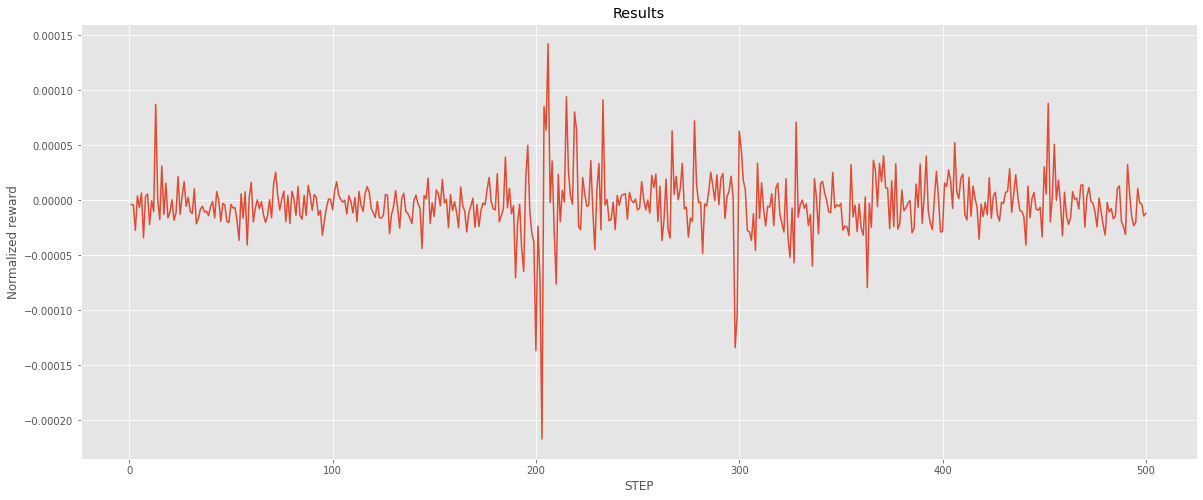

In [ ]:
%matplotlib inline

plt.figure(figsize=(20,8))
plt.xlabel("STEP")
plt.ylabel("Normalized reward")
plt.plot(s,r)
plt.title("Results")
plt.show()